<h1 style="text-align:center">MCHE 513: Intermediate Dynamics</h1>
<h3 style="text-align:center">Homework 1 &mdash; Fall 2015</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

We'll use the [Sympy](http://www.sympy.org/) library to solve these problems analytically. To use it, we need to import it.

In [1]:
# import Sympy and start "pretty printing"
import sympy
sympy.init_printing()

In [2]:
# We also want to import the sympy.physics.mechanics module

# Note that * imports are usually considered bad practice
from sympy.physics.mechanics import *

## Problem 2.1

In [3]:
# Define symbols for the variables we'll use in the problem solution
k, zeta, beta, rho = sympy.symbols('k zeta beta rho')
x, y, r = sympy.symbols('x y r')

x = k * zeta**2
y = 2 * k * (1 - sympy.exp(zeta))

v = beta * zeta

In [4]:
# Define the fixed, Newtonian Frame
N = ReferenceFrame('N')

In [5]:
# Now, define the position vector within it
r = x * N.x + y * N.y

# We can now differntiate this vector with respect to zeta 
# Here we are using the vectorized version of diff vector.diff(variable, frame)
r_prime = r.diff(zeta, N)
r_dbl_prime = r_prime.diff(zeta, N)

In [6]:
# We can examine the resulting vectors
r_prime

In [7]:
r_dbl_prime

In [8]:
s_prime = r_prime.magnitude()
s_prime

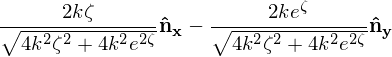

In [9]:
e_t = r_prime / s_prime
e_t

In [10]:
e_n = rho / s_prime**4 * (r_dbl_prime * s_prime**2 - r_prime * (r_prime & r_dbl_prime))

The value of $\rho$ can be found from the fact the $|\bar{e}_n| = 1$. To do so, solve the equation 

$$ |\bar{e}_n| - 1 = 0 $$

Most numerical equation solvers require equations be rewritten in this form. SymPy is no different.

We can also use ```.subs(zeta, 0.5)``` to evaluate the solution at $\zeta = 0.5$. This can be chained onto the call to solve the equation to operate on the returned solution.

In [11]:
sympy.solve(e_n.magnitude() - 1, rho)[1].subs(zeta, 0.5)

We can now find the velocity and acceleration.

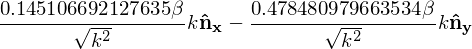

In [12]:
v_bar = v * e_t

# Use the .subs(zeta, 0.5) to evaluate at a value of zeta = 0.5
v_bar.subs(zeta, 0.5)

In [13]:
v_dot = v * v.diff(zeta) * 1 / s_prime

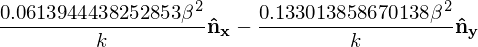

In [14]:
a_bar = v_dot * e_t + v**2 / rho * e_n

# Use the .subs(zeta, 0.5) to evaluate at a value of zeta = 0.5
a_bar.subs(zeta, 0.5)

## Problem 2.9

In [15]:
x, y = dynamicsymbols('x y')

x_dot = sympy.diff(x, sympy.Symbol('t'))
x_ddot = sympy.diff(x_dot, sympy.Symbol('t'))

y = 2 * (1 - 4 * x**2)

y_dot = sympy.diff(y, sympy.Symbol('t'))
y_ddot = sympy.diff(y_dot, sympy.Symbol('t'))

In [16]:
# Define the fixed, Newtonian Frame
N = ReferenceFrame('N')

# Write the velocity vector in the newtonian frame
vel = x_dot * N.x + y_dot * N.y

vel

In [17]:
# Write the acceleration vector in the fixed frame
accel = y_ddot * N.y

accel

We can again use the ```.subs()``` method to evaluate these expressions under the desired conditions

In [18]:
vel.subs(x_dot, 30)

In [19]:
accel.subs([(x_dot, 30), (x_ddot, 0)])

## Problem 2.19

In [20]:
R, theta = dynamicsymbols('R theta')
Norm, T, m, g, l = sympy.symbols('N T m g l')

L = l + (0.25 - R)

l = 2 * (0.25) * sympy.sin(theta / 2)

R = l

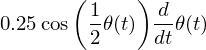

In [21]:
R_dot = sympy.diff(R, sympy.Symbol('t'))
R_ddot = sympy.diff(R_dot, sympy.Symbol('t'))

theta_dot = 5  # rad/s, from problem definition
theta_ddot = 0 # from problem definition

R_dot

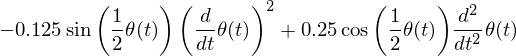

In [22]:
R_ddot

In [23]:
# Substitute the values of theta_dot and theta_ddot into R_dot and R_ddot
R_dot = R_dot.subs([(sympy.diff(theta, sympy.Symbol('t')), theta_dot), 
                    (sympy.diff(theta, sympy.Symbol('t'), 2), theta_ddot), 
                    (theta, 0.927), 
                    (g, 9.81), 
                    (m, 0.5)])

R_dot

In [24]:
# Substitute the values of theta_dot and theta_ddot into R_dot and R_ddot
R_ddot = R_ddot.subs([(sympy.diff(theta, sympy.Symbol('t'), 2), theta_ddot),
                      (sympy.diff(theta, sympy.Symbol('t')), theta_dot),                        
                      (theta, 0.927), 
                      (g, 9.81), 
                      (m, 0.5)])

R_ddot

With these parameters, the acceleration of the mass can be found. Each direction can be solved independently, but let's use frames.

In [25]:
accel_er = R_ddot - R * theta_dot**2
accel_en = R * theta_ddot + 2 * R_dot * theta_dot

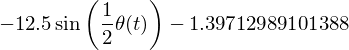

In [26]:
accel_er

In [27]:
accel_en

Now, just apply Newton's 2nd law in each direction.

In [28]:
Tension = sympy.solve(T - m*g*sympy.sin(theta) - m * accel_er, T)

In [29]:
Tension[0].subs([(sympy.diff(theta, sympy.Symbol('t')), 0.5), 
                 (sympy.diff(theta, sympy.Symbol('t'), 2), 0), 
                 (theta, 0.927), 
                 (g, 9.81), 
                 (m, 0.5)])

In [30]:
Normal = sympy.solve(Norm - m * g * sympy.cos(theta) - m * accel_en, Norm)

In [31]:
Normal[0].subs([(sympy.diff(theta, sympy.Symbol('t')), 0.5), 
                (sympy.diff(theta, sympy.Symbol('t'), 2), 0), 
                (theta, 0.927), 
                (g, 9.81), 
                (m, 0.5)])

## Problem 2.21

In [32]:
R, theta = dynamicsymbols('R theta')
Norm, T, m, g, v, rho, theta_dot, v_dot = sympy.symbols('N T m g v rho theta_dot v_dot')

rho = 0.5     # radius of circle
H = 0.8       # height of opening from circle center

R = sympy.sqrt(rho**2 + H**2)
R_dot = -25.0 # negative because it's in the -e_r direction
R_ddot = 0.0
theta = sympy.atan(0.5 / 0.8)

# Solve the e_r direction component of the total velocity for speed
speed = sympy.solve(R_dot + v * sympy.cos(theta), v)[0] # the [0] is needed because sympy.solve returns a list

print('The speed is {:0.2f} m/s.'.format(speed))

The speed is 29.48 m/s.


In [33]:
# Solve the e_theta direction component of the total velocity for theta_dot
ang_vel = sympy.solve(R * theta_dot - speed * sympy.sin(theta), theta_dot)[0] # the [0] is needed because sympy.solve returns a list

print('The angular velocity is {:0.2f} rad/s.'.format(ang_vel))

The angular velocity is 16.56 rad/s.


Now, follow a similar procedure for the acceleration.

In [34]:
# e_r direction
speed_change = sympy.solve(R_ddot - R * ang_vel**2 + v_dot * sympy.cos(theta) 
                           + speed**2 / rho * sympy.sin(theta), v_dot)[0] # the [0] is needed because sympy.solve returns a list

print('The rate of change of speed is {:0.2f} m/s^2.'.format(speed_change))

The rate of change of speed is -781.25 m/s^2.


To solve for the tension, use Newton's 2nd law. The $\bar{e}_t$ direction will allow us to solve for the tension using the parameters we've already defined.

In [35]:
# F = ma in the e_t direction
Tension = sympy.solve(T * sympy.cos(theta) - m * g - m * speed_change, T)[0]

print('The resulting tension is {:0.2f} N.'.format(Tension.subs([(m, 0.2), (g, 9.81)])))

The resulting tension is -181.94 N.


<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.
    

In [36]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())